In [46]:
import librosa
import numpy
import pandas

import matplotlib.pyplot as plt
import IPython.display
import librosa.display

import sklearn.preprocessing

In [1]:
noisy_with_bird = ['https://storage.googleapis.com/dcase2018-bad/birdvox/wav/008d8612-f008-4a75-a9d4-e8292c8588cf.wav'
 'https://storage.googleapis.com/dcase2018-bad/birdvox/wav/00960c0b-16e5-4a5b-a5e7-ac1fef8f488f.wav'
 'https://storage.googleapis.com/dcase2018-bad/birdvox/wav/00adbc49-77ef-4b7e-a453-cbb4ee011e11.wav']

nosy_without_bird = ['https://storage.googleapis.com/dcase2018-bad/birdvox/wav/00837ab5-0ce0-4448-af39-a56d95be35bf.wav'
 'https://storage.googleapis.com/dcase2018-bad/birdvox/wav/00a76d1a-d12b-411e-a4ca-61720d79aaba.wav'
 'https://storage.googleapis.com/dcase2018-bad/birdvox/wav/00c183b5-9207-43ec-a8ea-0aca76d1c8f5.wav']

clear_with_bird = ['https://storage.googleapis.com/dcase2018-bad/warblr10k_public/wav/4dd5046d-c962-4f02-a820.wav'
 'https://storage.googleapis.com/dcase2018-bad/warblr10k_public/wav/3661273c-19b9-4ea0-abc5.wav'
 'https://storage.googleapis.com/dcase2018-bad/warblr10k_public/wav/960784f4-34aa-4235-9d9c.wav']

caralarm_and_bird = ['https://storage.googleapis.com/dcase2018-bad/warblr10k_public/wav/13562d9b-aa0b-42ca-9198.wav']

/usr/lib/python3.7/site-packages/librosa/core/audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),


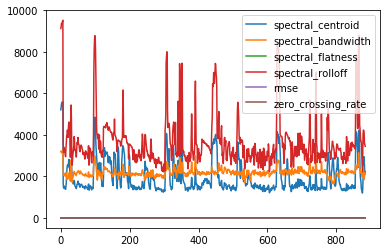

In [60]:

def low_level_features(y, sr, contrast=False):
    S, phase = librosa.magphase(librosa.stft(y=y))
    
    spectral_features = [
        'spectral_centroid',
        'spectral_bandwidth',
        'spectral_flatness',
        'spectral_rolloff',
        'rmse',
    ]
    def extract_spectral(feature):
        func = getattr(librosa.feature, feature)
        d = func(S=S).reshape(-1)
        return d
    
    features = { f: extract_spectral(f) for f in spectral_features }
    features['zero_crossing_rate'] = librosa.feature.zero_crossing_rate(y).reshape(-1)

    if contrast:
        spectral_contrast = librosa.feature.spectral_contrast(S=S, n_bands=6)
        for band in range(0, spectral_contrast.shape[0]):
            name = 'spectral_contrast_{}'.format(band)
            features[name] = spectral_contrast[band,:]
    
    n_frames = len(features['rmse'])
    return pandas.DataFrame(features, index=range(0, n_frames))


/usr/lib/python3.7/site-packages/librosa/core/audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),
/usr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d57217748>,
      dtype=object)

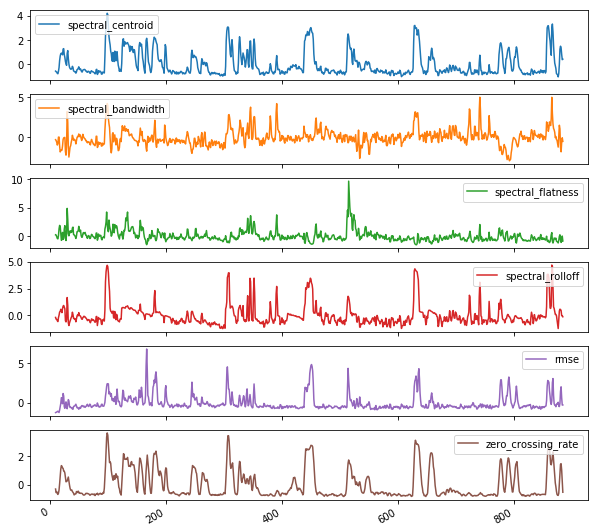

In [80]:
scaler = sklearn.preprocessing.StandardScaler()
lowlevel = low_level_features(y, sr)
lowlevel = lowlevel.tail(n=-10) # cut off abnormal values caused by start
lowlevel[:] = scaler.fit_transform(lowlevel[:])
lowlevel.plot(subplots=True, figsize=(10,10))

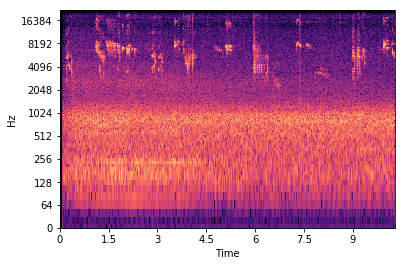

In [28]:
f = '4dd5046d-c962-4f02-a820.wav'
y, sr = librosa.load(f, sr=44100)
librosa.display.waveplot(y, sr=sr)
S = librosa.amplitude_to_db(numpy.abs(librosa.stft(y)), ref=numpy.max)
librosa.display.specshow(S, y_axis='log', x_axis='time', sr=sr)
IPython.display.Audio(f)

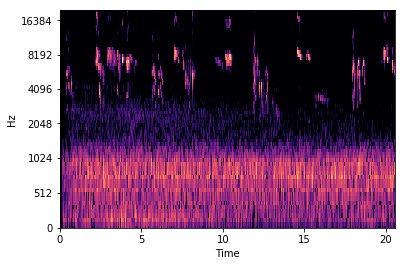

In [27]:
mels = librosa.feature.melspectrogram(y, sr=sr, fmin=0, fmax=20000, n_mels=64, hop_length=256, n_fft=512)
S = librosa.amplitude_to_db(mels, ref=numpy.max)
librosa.display.specshow(S, y_axis='mel', x_axis='time', fmin=0, fmax=20000, sr=sr)

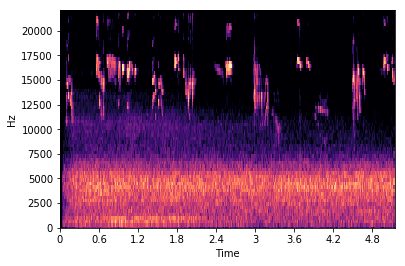

In [20]:
mels = librosa.feature.melspectrogram(y, sr=sr, n_mels=64, hop_length=1024, n_fft=2048)
S = librosa.amplitude_to_db(mels, ref=numpy.max)
librosa.display.specshow(S, y_axis='hz', x_axis='time', sr=sr)